In [1]:
# set working directory to currtent folder
import os 
os.chdir("github/Fin_Toolkit_Learn/Data_Analysis/")

In [4]:
#conda install yfinance

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import datetime
import os

In [ ]:
# User input for the stock ticker symbol
ticker = input('Enter a ticker: ')

### Historical Data

In [12]:
# Downlaod historical data
index = 'SPY'  # S&P500 as the index for comparison
num_of_years = 5  # Number of years for historical data
start = datetime.date.today() - datetime.timedelta(days=int(365.25 * num_of_years))

time.sleep(2) # wait 2 seconds before the request
# Download historical stock prices
stock_data = yf.download(ticker, start=start)['Adj Close']

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['NVDA']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


### Plot Historical Data and Distribution

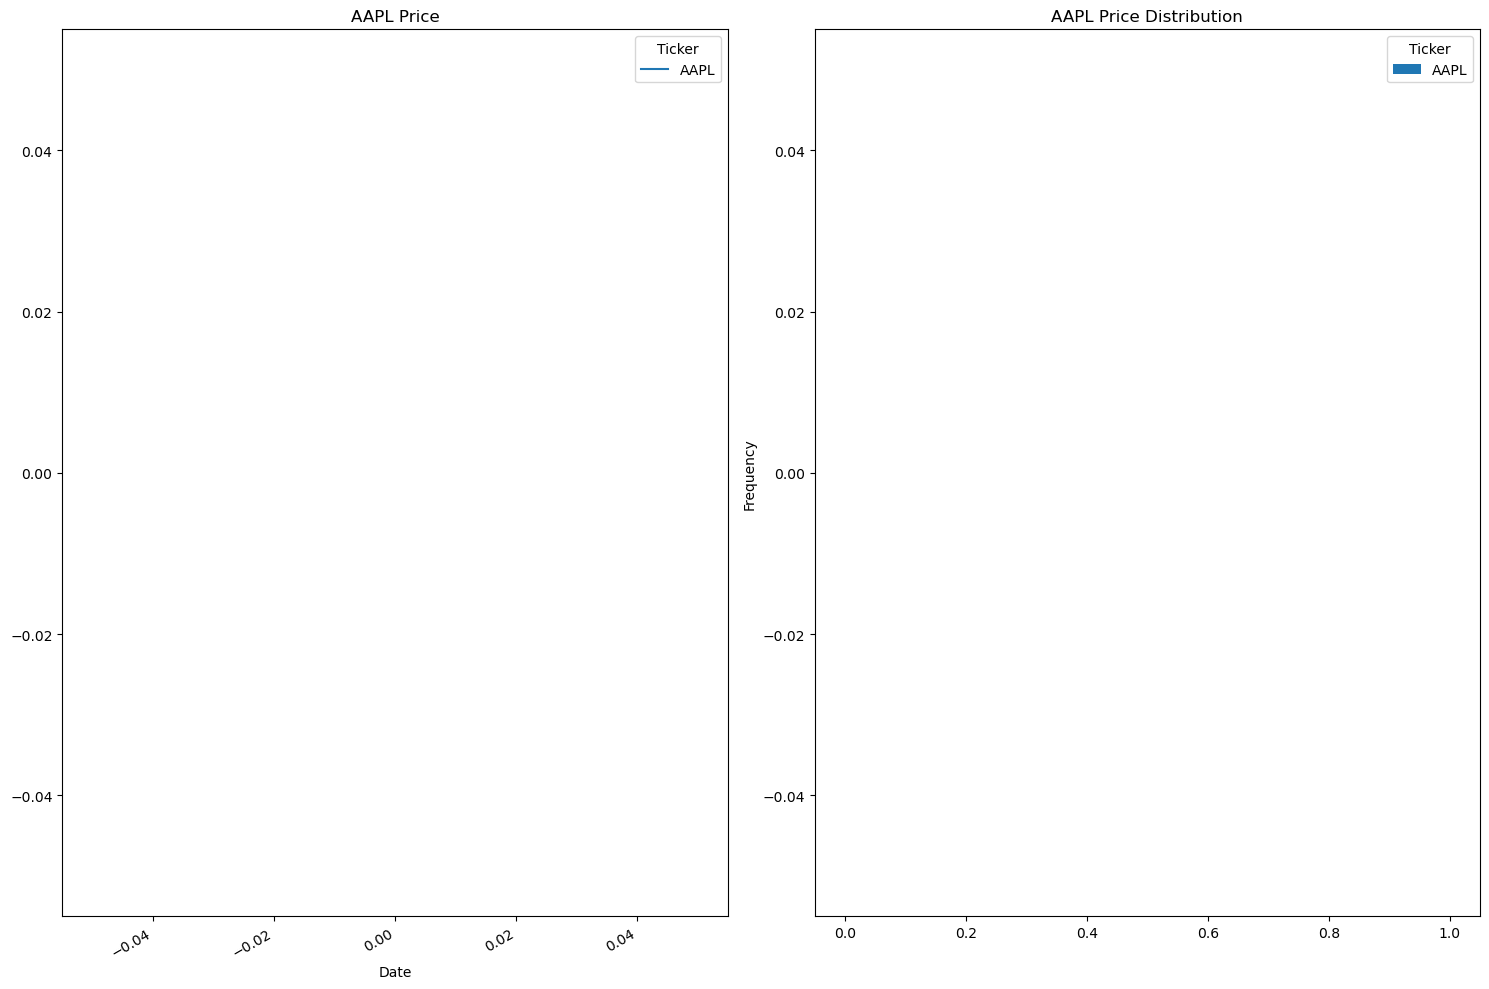

In [7]:
# Plotting stock prices and their distribution
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
stock_data.plot(title=f'{ticker.upper()} Price', ax=ax[0])
stock_data.plot.hist(title=f'{ticker.upper()} Price Distribution', ax=ax[1], bins=30)
plt.tight_layout()
plt.show()

In [ ]:
# Calculating and plotting stock returns
stock_returns = stock_data.apply(np.log).diff(1)
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
stock_returns.plot(title=f'{ticker.upper()} Returns', ax=ax[0])
stock_returns.plot.hist(title=f'{ticker.upper()} Returns Distribution', ax=ax[1], bins=30)
plt.tight_layout()
plt.show()

# Rolling statistics for stock returns
rolling_window = 22
rolling_mean = stock_returns.rolling(rolling_window).mean()
rolling_std = stock_returns.rolling(rolling_window).std()
rolling_skew = stock_returns.rolling(rolling_window).skew()
rolling_kurtosis = stock_returns.rolling(rolling_window).kurt()

# Combining rolling statistics into a DataFrame
signals = pd.concat([rolling_mean, rolling_std, rolling_skew, rolling_kurtosis], axis=1)
signals.columns = ['Mean', 'Std Dev', 'Skewness', 'Kurtosis']
signals.plot(subplots=True, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Volatility analysis for S&P500
index_data = yf.download(index, start=start)['Adj Close']
index_returns = index_data.apply(np.log).diff(1)
index_volatility = index_returns.rolling(rolling_window).std()

# Gaussian Mixture Model on S&P500 volatility
gmm_labels = GaussianMixture(2).fit_predict(index_volatility.values.reshape(-1, 1))
index_data = index_data.reindex(index_volatility.index)

# Plotting volatility regimes
plt.figure()
index_data[gmm_labels == 0].plot(style='bo', alpha=0.2)
index_data[gmm_labels == 1].plot(style='ro', alpha=0.2)
plt.title(f'{index} Volatility Regimes (Gaussian Mixture)')
plt.tight_layout()
plt.show()